# 3D Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
import sympy as sm
from IPython.display import display, Math
import os
import math

# Data

In [2]:
params1 = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4) #K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda

params2 = (1000, 6, 0.5, 1 / 12.8, 1 / 1.5, -np.log(0.64) / 12.8, 1 / 93.6, 1 / 79.5, 0.1, 0.1, 4)# 0.034, 0.01, 0.012

def eta(params):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = params
    print((vL*vF*b*0.5)/((uL+vL)*uF), "hhh", (gamma*vF)/((uF+gamma)*(uF +vF))) # $\frac{\gamma v_F}{(\mu_F+ \gamma)(\mu_F+v_F)}=0
eta(params1)
eta(params2)

14.787066246056781 hhh 0.49603174603174605
109.93667834763947 hhh 0.8718187461204221


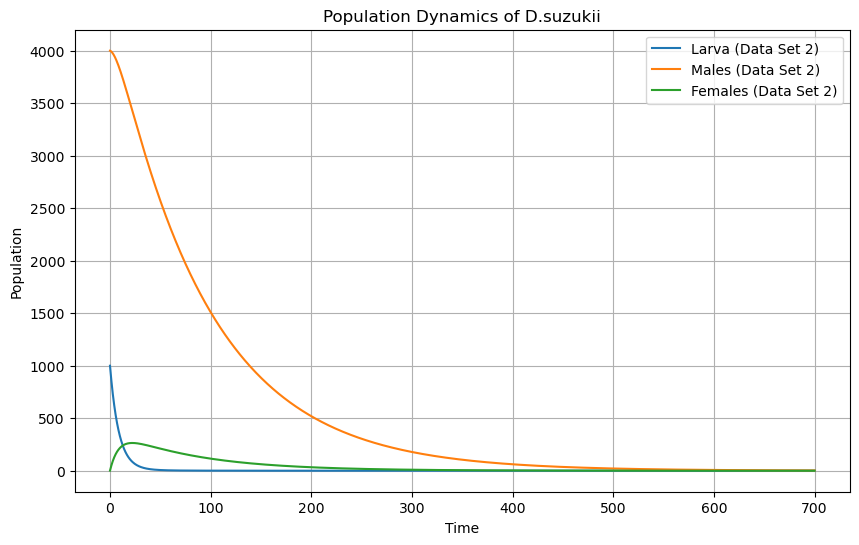

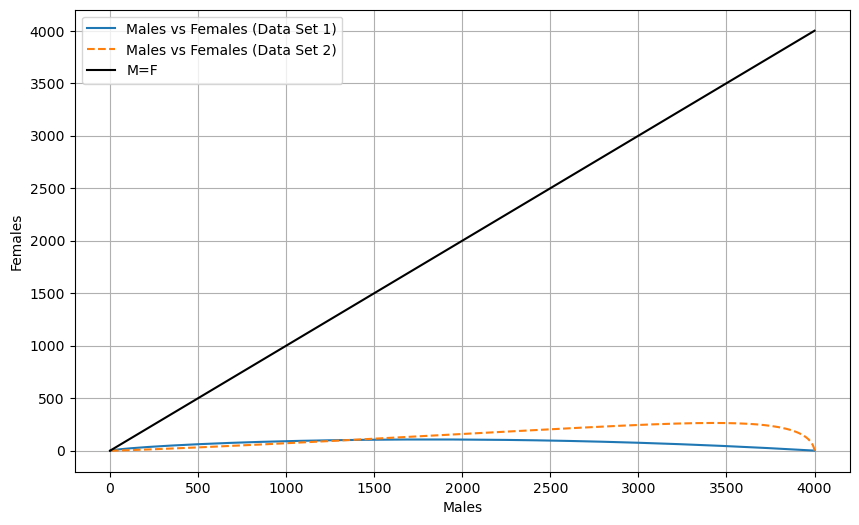

In [7]:


# Define the ODE system function
def model_ds_b(t, X, params):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = params
    Ms = 40000
    Fs = 40000
    L = X[0] #larva
    M = X[1] #Males 
    F = X[2] #females mated with wild males
    #ODE system general case
    if Ms==0 and Fs!=0:
        L_dot = b*(1-(L/K))*vF*(F/(F+Fs))*F - (vL+uL)*L
    elif Ms!=0 and Fs==0:
        L_dot = b*(1-(L/K))*vF*(M/(M+Ms))*F - (vL+uL)*L
    elif  Ms==0 and Fs==0:
        L_dot = b*(1-(L/K))*vF*min(lamda*M/F,1)*F - (vL+uL)*L
    else:
        L_dot = b*(1-(L/K))*vF*(M/(M+Ms))*(F/(F+Fs))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    F_dot = (1-m)*vL*L -uF*F #(uF+delta)*F
    
    return np.array([L_dot, M_dot, F_dot])

# Parameters for the first set of data
params1 = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4) #K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda

# Parameters for the second set of data
params2 = (1000, 6, 0.5, 1 / 12.8, 1 / 1.5, -np.log(0.64) / 12.8, 1 / 93.6, 1 / 79.5, 0.1, 0.1, 4)# 0.034, 0.01, 0.012

# Initial conditions
L0 = 1000
M0 = 4000
F0 = 1

# Time span for integration
t_span = (0, 700)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
t = np.linspace(t_span[0], 4000, 1000)

# Initial state vector
initial_state = np.array([L0, M0, F0])

# Solve the ODEs for the first set of parameters
solution1 = solve_ivp(model_ds_b, t_span, initial_state, args=(params1,), t_eval=t_eval)

# Solve the ODEs for the second set of parameters
solution2 = solve_ivp(model_ds_b, t_span, initial_state, args=(params2,), t_eval=t_eval)

# Plot the solutions for both parameter sets
plt.figure(figsize=(10, 6))
#plt.plot(solution1.t, solution1.y[0], label='Larva (Data Set 1)')
#plt.plot(solution1.t, solution1.y[1], label='Males (Data Set 1)')
#plt.plot(solution1.t, solution1.y[2], label='Females (Data Set 1)')
plt.plot(solution2.t, solution2.y[0], label='Larva (Data Set 2)')#linestyle='dashed',
plt.plot(solution2.t, solution2.y[1], label='Males (Data Set 2)')#linestyle='dashed',
plt.plot(solution2.t, solution2.y[2], label='Females (Data Set 2)')#linestyle='dashed',
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics of D.suzukii')
plt.legend()
plt.grid()

# Plot the population dynamics over time
plt.figure(figsize=(10, 6))
plt.plot(solution1.y[1], solution1.y[2], label='Males vs Females (Data Set 1)')
plt.plot(solution2.y[1], solution2.y[2], linestyle='dashed', label='Males vs Females (Data Set 2)')           

        # Plot the line x=y
plt.plot(t, t, 'k-', label='M=F')
        # Curve labels
       # plt.plot(0, 0, 'b-.', label='Male')
            
        # Figure title and axis labels
#fig.suptitle("Males vs Females numbers")
plt.xlabel('Males')
plt.ylabel('Females')
plt.grid()
plt.legend(loc='best')


# Releases

- 1) males releases

# Dynamic of the population with males releases

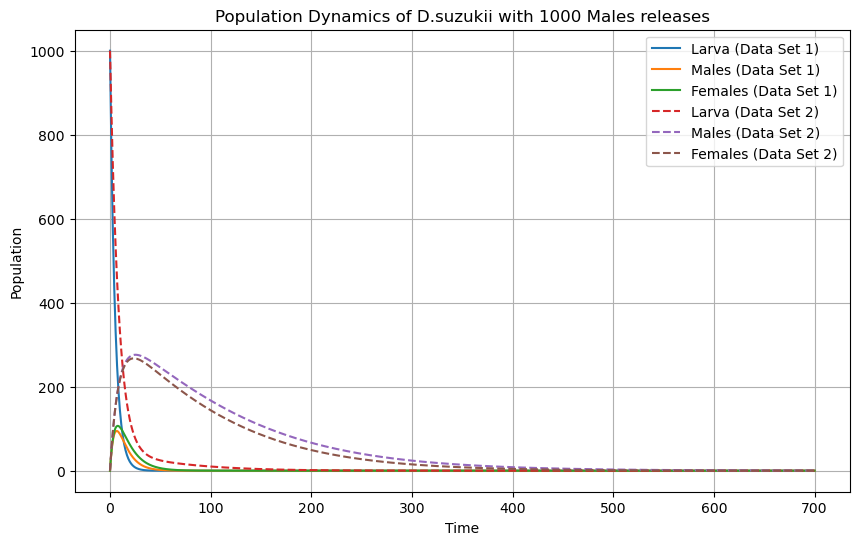

In [4]:

# Define the ODE system function
def model_ds_b(t, X, params):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = params
    Ms = 100000
    Fs = 0
    L = X[0] #larva
    M = X[1] #Males 
    F = X[2] #females mated with wild males
    #ODE system general case
    if Ms==0 and Fs!=0:
        L_dot = b*(1-(L/K))*vF*(F/(F+Fs))*F - (vL+uL)*L
    elif Ms!=0 and Fs==0:
        L_dot = b*(1-(L/K))*vF*(M/(M+Ms))*F - (vL+uL)*L
    elif  Ms==0 and Fs==0:
        L_dot = b*(1-(L/K))*vF*min(lamda*M/F,1)*F - (vL+uL)*L
    else:
        L_dot = b*(1-(L/K))*vF*(M/(M+Ms))*(F/(F+Fs))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    F_dot = (1-m)*vL*L -uF*F #(uF+delta)*F
    
    return np.array([L_dot, M_dot, F_dot])

# Parameters for the first set of data
params1 = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4) #K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda

# Parameters for the second set of data
params2 = (1000, 6, 0.5, 1 / 12.8, 1 / 1.5, -np.log(0.64) / 12.8, 1 / 93.6, 1 / 79.5, 0.1, 0.1, 4)# 0.034, 0.01, 0.012

# Initial conditions
L0 = 1000
M0 = 0
F0 = 0

# Time span for integration
t_span = (0, 700)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
t = np.linspace(t_span[0], 4000, 1000)

# Initial state vector
initial_state = np.array([L0, M0, F0])

# Solve the ODEs for the first set of parameters
solution1 = solve_ivp(model_ds_b, t_span, initial_state, args=(params1,), t_eval=t_eval)

# Solve the ODEs for the second set of parameters
solution2 = solve_ivp(model_ds_b, t_span, initial_state, args=(params2,), t_eval=t_eval)

# Plot the solutions for both parameter sets
plt.figure(figsize=(10, 6))
plt.plot(solution1.t, solution1.y[0], label='Larva (Data Set 1)')
plt.plot(solution1.t, solution1.y[1], label='Males (Data Set 1)')
plt.plot(solution1.t, solution1.y[2], label='Females (Data Set 1)')
plt.plot(solution2.t, solution2.y[0], linestyle='dashed', label='Larva (Data Set 2)')
plt.plot(solution2.t, solution2.y[1], linestyle='dashed', label='Males (Data Set 2)')
plt.plot(solution2.t, solution2.y[2], linestyle='dashed', label='Females (Data Set 2)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics of D.suzukii with 1000 Males releases')
plt.legend()
plt.grid()


# Equilbrium points and its stability studies

In [42]:
#Les points d'intersection des droites MS et de la parabole
def qintersections(t,curve1, curve2,positive=True,limit=True):
    intersections = []
    prev_dif = 0
    t0, prev_c1, prev_c2 = None, None, None
    for t1, c1, c2 in zip(t, curve1, curve2):
        new_dif = c2 - c1
        if np.abs(new_dif) < 1e-12: # a trouvé un zéro exact, c'est très improbable
            intersections.append((t1, c1))
        elif new_dif * prev_dif < 0:  # la fonction a changé de signe entre ce point et le précédent
            # faire une interpolation linéaire pour trouver le t entre t0 et t1 où les courbes seraient égales
            # Voici l'intersection entre la ligne [(t0, prev_c1), (t1, c1)] et la ligne [(t0, prev_c2), (t1, c2)].
            # à cause du changement de signe, nous savons qu'il y a une intersection entre t0 et t1.
            denom = prev_dif - new_dif
            intersections.append(((-new_dif*t0  + prev_dif*t1) / denom, (c1*prev_c2 - c2*prev_c1) / denom))
        t0, prev_c1, prev_c2, prev_dif = t1, c1, c2, new_dif
    if len(intersections) == 0:
        res = r"\textit{No intersections between}"
        form = r"\textit{$y=M_S$ and $M_S=\frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$}"
        display(Math(res + form))
        print("-------------------------------------------")
    if len(intersections) == 1:
        res = r"\textit{One intersection point between}"
        form = r"\textit{$y=M_S$ and $M_S=\frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$} \\"
        pts = r"\textit{at the equilibrium point $L_0$ with coordinates }" + str(intersections)
        display(Math(res + form + pts))
        print("-------------------------------------------")
    if len(intersections) == 2:
        res = r"\textit{Two intersection points between}"
        form = r"\textit{$y=M_S$ and $M_S=\frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$} \\"
        pts = r"\textit{at the equilibrium points $L_1$ and $L_2$ with respective coordinates } \\"
        cod = str(intersections[0])+ " and " +str(intersections[1])
        display(Math(res+form+pts+cod))
        print("-------------------------------------------")
    return intersections

In [43]:
def intersection(param, i):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = param
    eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))
    L_median = (K/2) * (1 - (1 / eta0))  # Number of Larvae at the top of the parabola
    L_max = K * (1 - (1 / eta0))  # Maximum number of larvae on the parabola MS
    L0 = 0  # Minimum number of larvae on the parabola MS
    Ln = np.array(np.arange(L0, L_max, 0.1))  # Discretization of L values
    Ms = [-eta0 * ((vL*m)/uM) * (l**2) / K + ((vL*m)/uM) * (eta0 - 1) * l for l in Ln]  # Values of MS along the parabola
    Ms_col = max(Ms)
    Ms_sup = Ms_col * 1.1  # MS with non-existence of positive equilibria
    Ms_inf = Ms_col * 0.9  # MS at positive equilibria

# Different equilibria
# Case 1: Col point (y = Max_Ms)
    y_col = [Ms_col] * len(Ln)  # y = MS at the top of the parabola
    print("-----------------------data", i, "--------------------")
    display(Math(r"\textit {At the top of the parabola i.e $M_S = M_S(L)$}"))
    I_col = qintersections(Ln, Ms, y_col)  # Intersection points

# Case 2: Non-existence of positive equilibria (Ms > Max_Ms)
    y_sup = [Ms_sup] * len(Ln)  # y = MS above the top of the parabola
    display(Math(r"\textit {For $M_S > M_S(L)$}"))
    I_sup = qintersections(Ln, Ms, y_sup)  # Intersection points

# Case 3: Existence of positive equilibria (Ms < Max_Ms)
    y_inf = [Ms_inf] * len(Ln)  # y = MS below the top of the parabola
    display(Math(r"\textit {For $M_S < M_S(L)$}"))
    I_inf = qintersections(Ln, Ms, y_inf)  # Intersection points

    ###############################################""

    # Number of Larvae as a function of the number of sterile males
    plt.plot(Ln, Ms, color='green')

# Plot horizontal lines passing through MS
    plt.axhline(Ms_col, label=r'$\bar{M_S} = \max(M_S)$', color="red", linestyle='solid')  # vertex of the parabola
    plt.axhline(Ms_sup, label=r'$\bar{M_S} > \max(M_S)$', color="pink", linestyle=':')  # above the vertex of the parabola
    plt.axhline(Ms_inf, label=r'$\bar{M_S} < \max(M_S)$', color="grey", linestyle='--')  # below the vertex of the parabola

# Intersection points
# Vertex of the parabola
    plt.axvline(L_median, color='gray', linestyle='dotted', ymax=0.85)
# First intersection point of case 2: y < MS_max
    plt.axvline(np.flip(I_inf[0][0]), color='gray', linestyle='dotted', ymax=0.80)
# Second intersection point of case 2: y < MS_max
    plt.axvline(np.flip(I_inf[1][0]), color='gray', linestyle='dotted', ymax=0.80)

    plt.plot(*zip(*I_inf), 'ro')  # Plot intersection points

# Annotations on points and curves
    plt.annotate(r'$ L = \frac{K}{2}(1-\frac{1}{\eta_0})$', (L_median, 1), rotation=45, color='grey')
    plt.annotate(r'$ L = 0$', (-0.5, 1), rotation=45, color='grey')
    plt.annotate(r'$ L = K(1-\frac{1}{\eta_0})$', (L_max, 1), rotation=45, color='grey')
    plt.annotate(r'$ {L_1}^*$', (I_inf[0][0], 1), rotation=45, color='grey')
    plt.annotate(r'$ {L_2}^*$', (I_inf[1][0], 1), rotation=45, color='grey')

# Graph titles
    plt.legend(bbox_to_anchor=(.5, .4), loc='center')
    plt.ylabel('Number of Sterile Males')
    plt.xlabel('Number of Larvae')
    plt.title(fr'$Ms = \frac{{-\eta_0}}{{K}} \gamma L^2+(\eta_0-1) \gamma L$ Data Set {i}')

# Axis limits
    plt.ylim(bottom=-0.1)
    plt.xlim(right=K)

# Export the graph
    #name = output_fold + r'\parabola'
    #plt.savefig(name + '.png', dpi=300)
# plt.savefig(name+'.pdf', dpi=300)

    plt.show()

-----------------------data 1 --------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


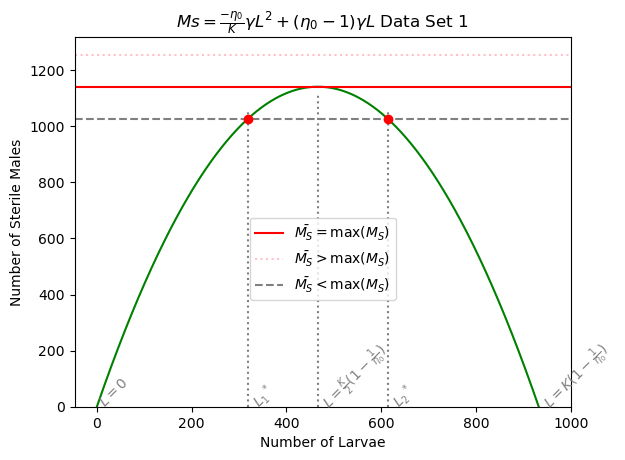

-----------------------data 2 --------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


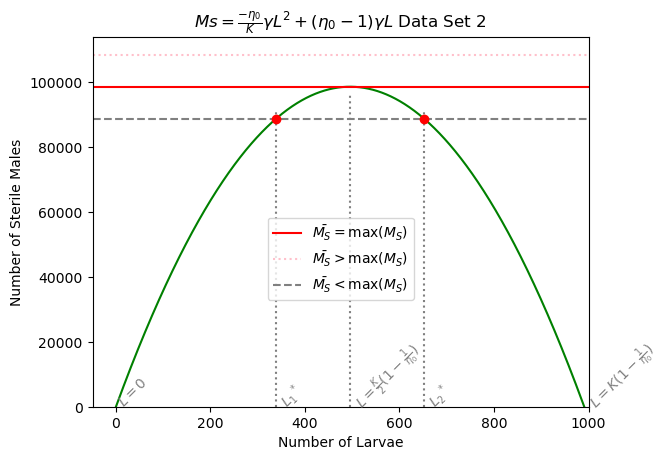

In [44]:
intersection(params1, 1)
intersection(params2, 2)

# Bifurcation

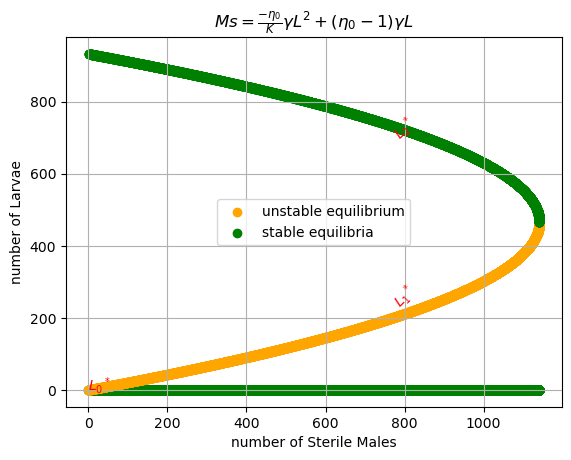

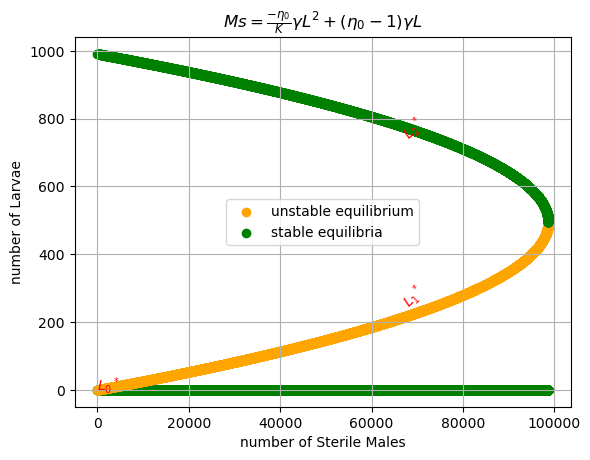

In [62]:
def bifurcation(param, i):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = param 
    etha0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))
    L_median = (K/2)*(1-(1/etha0))
    L_max = K*(1-(1/etha0))
    L0 = 0

    # Case 1: Null equilibrium (0,0,0,0) always stable
    Ln3 = np.array(np.arange(L0, L_max, 0.1))
    Ln_3=np.zeros_like(Ln3)
    Ms3 = [-etha0*((vL*m)/uM)*(l**2)/K + ((vL*m)/uM)*(etha0-1)*l for l in Ln3]
    plt.scatter(Ms3, Ln_3, color='green')

    # Case 2: Unstable positive equilibrium
    Ln1 = np.array(np.arange(L0, L_median, 0.1))
    Ms1 = [-etha0*((vL*m)/uM)*(l**2)/K + ((vL*m)/uM)*(etha0-1)*l for l in Ln1]
    plt.scatter(Ms1, Ln1, color='orange', label=r'unstable equilibrium')

# Case 3: Stable positive equilibrium
    Ln2 = np.array(np.arange(L_median, L_max, 0.1))
    Ms2 = [-etha0*((vL*m)/uM)*(l**2)/K + ((vL*m)/uM)*(etha0-1)*l for l in Ln2]
    plt.scatter(Ms2, Ln2, color='g', label=r'stable equilibria')

# Annotation on the graph
    plt.annotate(r'$ {L_1}^*$', (np.mean(Ms1), np.mean(Ln1)), rotation=45, color='red')
    plt.annotate(r'$ {L_2}^*$', (np.mean(Ms2), np.mean(Ln2)), rotation=45, color='red')
    plt.annotate(r'$ {L_0}^*$', (0, 0), color='red')

# Titles on the graph
    plt.xlabel('number of Sterile Males')
    plt.ylabel('number of Larvae')
    plt.title(r'$Ms = \frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$')
    plt.legend(bbox_to_anchor=(.5, .5), loc='center')

# Export the graph
    #plt.savefig(output_fold + r'\parabole_ms.png', dpi=300)
    plt.grid()
    plt.show()
bifurcation(params1, 1)
bifurcation(params2, 2)

# Female releases

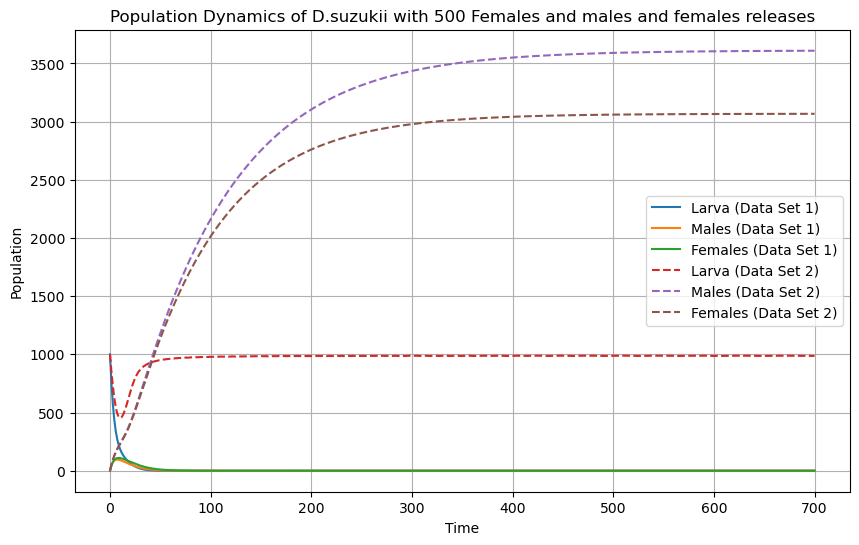

In [8]:

# Define the ODE system function
def model_ds_b(t, X, params):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = params
    Ms = 500
    Fs = 500
    L = X[0] #larva
    M = X[1] #Males 
    F = X[2] #females mated with wild males
    #ODE system general case
    if Ms==0 and Fs!=0:
        L_dot = b*(1-(L/K))*vF*(F/(F+Fs))*F - (vL+uL)*L
    elif Ms!=0 and Fs==0:
        L_dot = b*(1-(L/K))*vF*(M/(M+Ms))*F - (vL+uL)*L
    elif  Ms==0 and Fs==0:
        L_dot = b*(1-(L/K))*vF*min(lamda*M/F,1)*F - (vL+uL)*L
    else:
        L_dot = b*(1-(L/K))*vF*(M/(M+Ms))*(F/(F+Fs))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    F_dot = (1-m)*vL*L -uF*F #(uF+delta)*F
    
    return np.array([L_dot, M_dot, F_dot])

# Parameters for the first set of data
params1 = (1000, 9, 0.5, 1 / 12.8, 1 / 1.5, 0.12, 0.11, 0.08, 0.1, 0.1, 4) #K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda

# Parameters for the second set of data
params2 = (1000, 6, 0.5, 1 / 12.8, 1 / 1.5, -np.log(0.64) / 12.8, 1 / 93.6, 1 / 79.5, 0.1, 0.1, 4)# 0.034, 0.01, 0.012

# Initial conditions
L0 = 1000
M0 = 0
F0 = 0

# Time span for integration
t_span = (0, 700)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
t = np.linspace(t_span[0], 4000, 1000)

# Initial state vector
initial_state = np.array([L0, M0, F0])

# Solve the ODEs for the first set of parameters
solution1 = solve_ivp(model_ds_b, t_span, initial_state, args=(params1,), t_eval=t_eval)

# Solve the ODEs for the second set of parameters
solution2 = solve_ivp(model_ds_b, t_span, initial_state, args=(params2,), t_eval=t_eval)

# Plot the solutions for both parameter sets
plt.figure(figsize=(10, 6))
plt.plot(solution1.t, solution1.y[0], label='Larva (Data Set 1)')
plt.plot(solution1.t, solution1.y[1], label='Males (Data Set 1)')
plt.plot(solution1.t, solution1.y[2], label='Females (Data Set 1)')
plt.plot(solution2.t, solution2.y[0], linestyle='dashed', label='Larva (Data Set 2)')
plt.plot(solution2.t, solution2.y[1], linestyle='dashed', label='Males (Data Set 2)')
plt.plot(solution2.t, solution2.y[2], linestyle='dashed', label='Females (Data Set 2)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics of D.suzukii with 500 Females and males and females releases')
plt.legend()
plt.grid()


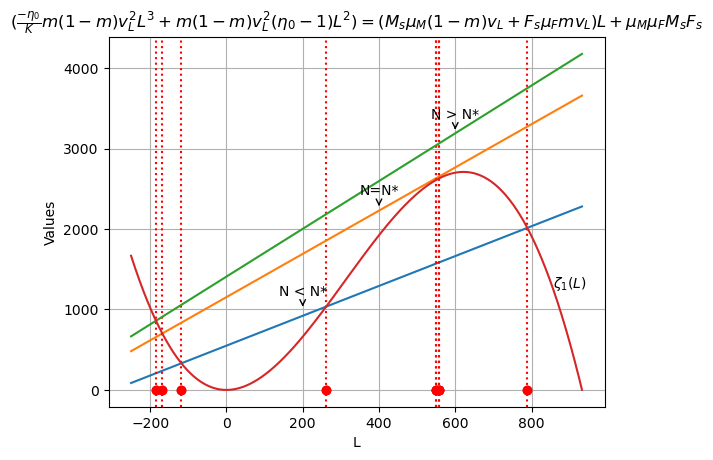

In [31]:
def inters(param, i, NPOP, annotation_x, annotation_y, x, y, a, c, l1, l2):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = param 
    # Calculations based on the parameters
    eta0 = ((1 - m) * vL * vF * b) / (uF * (uL + vL))  # Number of baseline descendants
    L0 = 0
    L_max = K * (1 - (1 / eta0))

    Ln = np.array(np.arange(-250, L_max, 0.1))  # Discretization of L values
    right = np.array([(-(eta0 / K) * m * (1 - m) * vL ** 2 * L ** 3 + m * (1 - m) * vL ** 2 * (eta0 - 1) * L ** 2) for L in Ln])  # Values of MS along the parabola
   

    for N in NPOP:
        Fs = N/2
        Ms = N/2   
        left = np.array([(Ms * uM * (1 - m) * vL + Fs * uF * m * vL) * L + uM * Ms * Fs * uF for L in Ln])

        term1 = -(eta0 / K) * m * (1 - m) * vL ** 2
        term2 = m * (1 - m) * vL ** 2 * (eta0 - 1)
        term3 = -(Ms * uM * (1 - m) * vL + Fs * uF * m * vL)
        term4 = -Ms * Fs * uM * uF
        roots = np.roots([term1, term2, term3, term4])
        #print('intersection points:', roots)

    #term11 = -3*(eta0 / K) * m * (1 - m) * vL ** 2
    #term22 = 2*m * (1 - m) * vL ** 2 * (eta0 - 1)
    #term33 = -(Ms * uM * (1 - m) * vL + Fs * uF * m * vL)
    #rootsprime = np.roots([term11, term22, term33])
    #print('where we have a one positive intersection point:', rootsprime)

# Create the plot
        
        plt.plot(Ln, left, label='Gamma(L) Curve')

# Highlight intersection points
        plt.plot(roots, [0] * len(roots), 'ro')
# Highlight intersection points on the x-axis
        for root in roots:
            plt.axvline(x=root, color='red', linestyle='dotted')
            plt.plot(root, 0, 'ro')

# Add labels and title to the plot
    plt.plot(Ln, right, label='zeta(L) Curve')
    # annotation above the orange line
    plt.annotate('N=N*', 
                xy=(annotation_x, annotation_y), 
                xytext=(0, 10), 
                textcoords='offset points', 
                ha='center', 
                color='black', 
                fontsize=10,
                arrowprops=dict(arrowstyle="->", color='black'))
        # annotation above the orange line
    plt.annotate('N < N*', 
                xy=(x, y), 
                xytext=(0, 10), 
                textcoords='offset points', 
                ha='center', 
                color='black', 
                fontsize=10,
                arrowprops=dict(arrowstyle="->", color='black'))
            # annotation above the orange line
    plt.annotate('N > N*', 
                xy=(a, c), 
                xytext=(0, 10), 
                textcoords='offset points', 
                ha='center', 
                color='black', 
                fontsize=10,
                arrowprops=dict(arrowstyle="->", color='black'))
    plt.annotate(r'$\zeta_1(L)$', 
                xy=(l1, l2), 
                xytext=(0, 10), 
                textcoords='offset points', 
                ha='center', 
                color='black', 
                fontsize=10)
                #arrowprops=dict(arrowstyle="->", color='black'))
    plt.xlabel('L')
    plt.ylabel('Values')
    plt.title(r'$(\frac{-\eta_0}{K}m(1 - m)v_L^2L^3 + m(1 - m)v_L^2 (\eta_0 - 1)L^2) = (M_s\mu_M(1 - m)v_L + F_s\mu_Fmv_L)L + \mu_M\mu_FM_sF_s$')
    plt.grid(True)

# Add a legend
    #plt.legend()
    name="intersection with sterile males and females"
    #plt.savefig(output_fold+'\\'+name+'.png', dpi=300)

# Display the plot
    plt.show()
inters(params1, 1, [500, 724, 800], 400, 2250, 200, 1000, 600, 3200, 900, 1100)


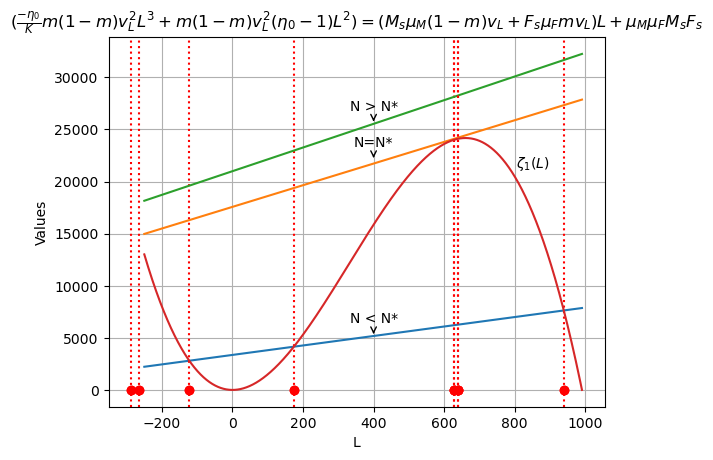

In [32]:
inters(params2, 2, [10000, 22870, 25000], 400, 22000, 400, 5100, 400, 25500, 850, 20000)


# Bifurcation

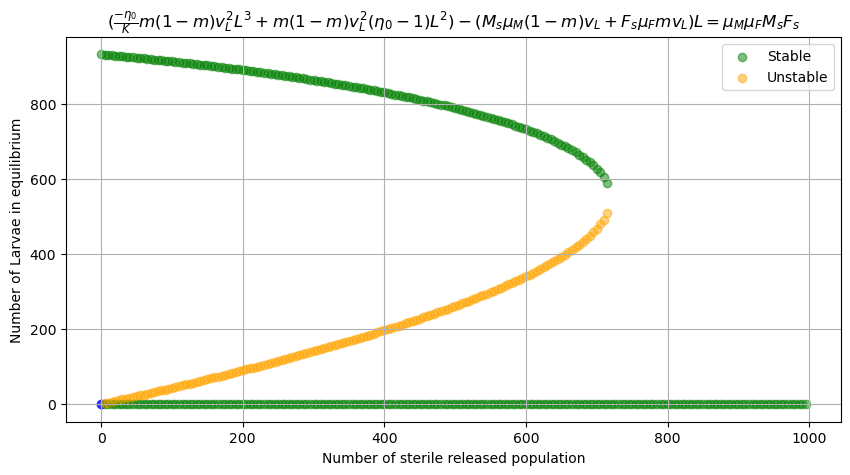

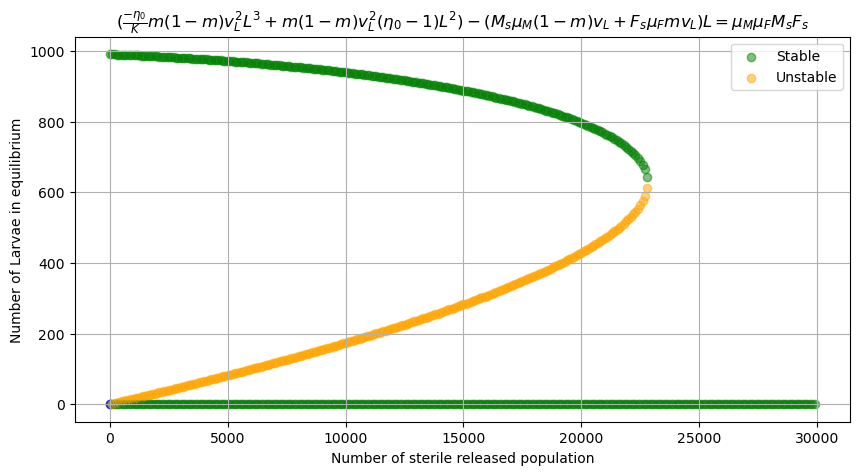

In [63]:
def bifurcation1(param, i):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = param
    eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######
    p=0.5
    L0=0
    L_max=K*(1-(1/eta0))
    N=np.arange(L0, 1000, 5)
    positive_roots = []
    for n in N:
  # Discretization of L values
    
        term1=-(eta0 / K) * m * (1 - m) * vL**2 
        term2=m * (1 - m) * vL**2 * (eta0 - 1)
        term3=  -p * n * uM * (1 - m) * vL - (1 - p) * n * uF * m * vL
        term4= -p * n * uM*(1 - p) * n * uF
    
        roots = np.roots([term1, term2, term3, term4])
        real_positive_roots = [root.real if root.real >= 0 else 0 for root in roots if np.isreal(root)]
        positive_roots.append(real_positive_roots)

    plt.figure(figsize=(10, 5))
    for i, root_list in enumerate(positive_roots):
        x = [N[i]] * len(root_list)
        y = root_list

    # Check stability condition and set color accordingly
        stability_condition = (-3 * m * (1 - m) * vL ** 2 * eta0 / K * np.array(y) ** 2 +
                            2 * (eta0 - 1) * m * (1 - m) * vL ** 2 * np.array(y) -
                            p * N[i] * uM * (1 - m) * vL -
                            (1 - p) * N[i] * uF * m * vL)
        stable_indices = np.where(stability_condition < 0)[0]
        unstable_indices = np.where(stability_condition > 0)[0]
        unstable_indices1 = np.where(stability_condition == 0)[0]
    #print(stable_indices,unstable_indices)
        plt.scatter(np.array(x)[stable_indices], np.array(y)[stable_indices], color='green', alpha=0.5)
        plt.scatter(np.array(x)[unstable_indices], np.array(y)[unstable_indices], color='orange', alpha=0.5)
        plt.scatter(np.array(x)[unstable_indices1], np.array(y)[unstable_indices1], color='blue', alpha=0.5)
    # Plot formatting
    plt.xlabel('Number of sterile released population')
    plt.ylabel('Number of Larvae in equilibrium')
    plt.title(r'$(\frac{-\eta_0}{K}m(1 - m)v_L^2L^3 + m(1 - m)v_L^2 (\eta_0 - 1)L^2)-(M_s\mu_M(1 - m)v_L + F_s\mu_Fmv_L)L = \mu_M\mu_FM_sF_s$')
    plt.legend(['Stable', 'Unstable'])
    plt.grid(True)

# Export the graph
#plt.savefig(output_fold + r'\parabole_ms.png', dpi=300)
    plt.show()

bifurcation1(params1, 1)    



def bifurcation2(param, i):
    K, b, m, vL, vF, uL, uM, uF, gamma, delta, lamda = param
    eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######
    p=0.5
    L0=0
    L_max=K*(1-(1/eta0))
    N=np.arange(L0, 30000, 100)
    positive_roots = []
    for n in N:
  # Discretization of L values
    
        term1=-(eta0 / K) * m * (1 - m) * vL**2 
        term2=m * (1 - m) * vL**2 * (eta0 - 1)
        term3=  -p * n * uM * (1 - m) * vL - (1 - p) * n * uF * m * vL
        term4= -p * n * uM*(1 - p) * n * uF
    
        roots = np.roots([term1, term2, term3, term4])
        real_positive_roots = [root.real if root.real >= 0 else 0 for root in roots if np.isreal(root)]
        positive_roots.append(real_positive_roots)

    plt.figure(figsize=(10, 5))
    for i, root_list in enumerate(positive_roots):
        x = [N[i]] * len(root_list)
        y = root_list

    # Check stability condition and set color accordingly
        stability_condition = (-3 * m * (1 - m) * vL ** 2 * eta0 / K * np.array(y) ** 2 +
                            2 * (eta0 - 1) * m * (1 - m) * vL ** 2 * np.array(y) -
                            p * N[i] * uM * (1 - m) * vL -
                            (1 - p) * N[i] * uF * m * vL)
        stable_indices = np.where(stability_condition < 0)[0]
        unstable_indices = np.where(stability_condition > 0)[0]
        unstable_indices1 = np.where(stability_condition == 0)[0]
    #print(stable_indices,unstable_indices)
        plt.scatter(np.array(x)[stable_indices], np.array(y)[stable_indices], color='green', alpha=0.5)
        plt.scatter(np.array(x)[unstable_indices], np.array(y)[unstable_indices], color='orange', alpha=0.5)
        plt.scatter(np.array(x)[unstable_indices1], np.array(y)[unstable_indices1], color='blue', alpha=0.5)
    # Plot formatting
    plt.xlabel('Number of sterile released population')
    plt.ylabel('Number of Larvae in equilibrium')
    plt.title(r'$(\frac{-\eta_0}{K}m(1 - m)v_L^2L^3 + m(1 - m)v_L^2 (\eta_0 - 1)L^2)-(M_s\mu_M(1 - m)v_L + F_s\mu_Fmv_L)L = \mu_M\mu_FM_sF_s$')
    plt.legend(['Stable', 'Unstable'])
    plt.grid(True)

# Export the graph
#plt.savefig(output_fold + r'\parabole_ms.png', dpi=300)
    plt.show()
   
bifurcation2(params2, 2)   

    #print(roots)